In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras.optimizers import Lion
import tensorflow as tf


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
"""використовується для перетворення міток класів (labels) у формат категорій (one-hot encoding) для задач мультикласової класифікації."""
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [6]:
"""Try this model with AveragePooling2D, padding change, kernal sizr 3,3, activation sigmoid / Also add Dropout(0.2)/(0.5) layer"""

model = Sequential()
model.add(Conv2D(64, (5, 5),
                    padding="same",
                    activation="relu",
                    input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [7]:
""". optimizer='rmsprop' / optimizer='Lion'  """
""" loss='binary_crossentropy' """
opt = Lion()
EPOCHS = 8
BATCH_SIZE=128

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/8
375/375 [==============================] - 16s 15ms/step - loss: 0.8110 - accuracy: 0.7173 - val_loss: 0.4307 - val_accuracy: 0.8454
Epoch 2/8
375/375 [==============================] - 5s 14ms/step - loss: 0.3534 - accuracy: 0.8735 - val_loss: 0.3253 - val_accuracy: 0.8859
Epoch 3/8
375/375 [==============================] - 5s 15ms/step - loss: 0.2768 - accuracy: 0.9012 - val_loss: 0.2705 - val_accuracy: 0.9022
Epoch 4/8
375/375 [==============================] - 5s 14ms/step - loss: 0.2310 - accuracy: 0.9163 - val_loss: 0.2496 - val_accuracy: 0.9100
Epoch 5/8
375/375 [==============================] - 6s 15ms/step - loss: 0.2001 - accuracy: 0.9272 - val_loss: 0.2397 - val_accuracy: 0.9134
Epoch 6/8
375/375 [==============================] - 6s 16ms/step - loss: 0.1736 - accuracy: 0.9373 - val_loss: 0.2281 - val_accuracy: 0.9183
Epoch 7/8
375/375 [==============================] - 6s 16ms/step - loss: 0.1506 - accuracy: 0.9456 - val_loss: 0.2232 - val_accuracy: 0.9247
Epoch

In [22]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 2s 6ms/step - loss: 0.2427 - accuracy: 0.9162
[0.24272790551185608, 0.9161999821662903]


313/313 [==============================] - 2s 5ms/step


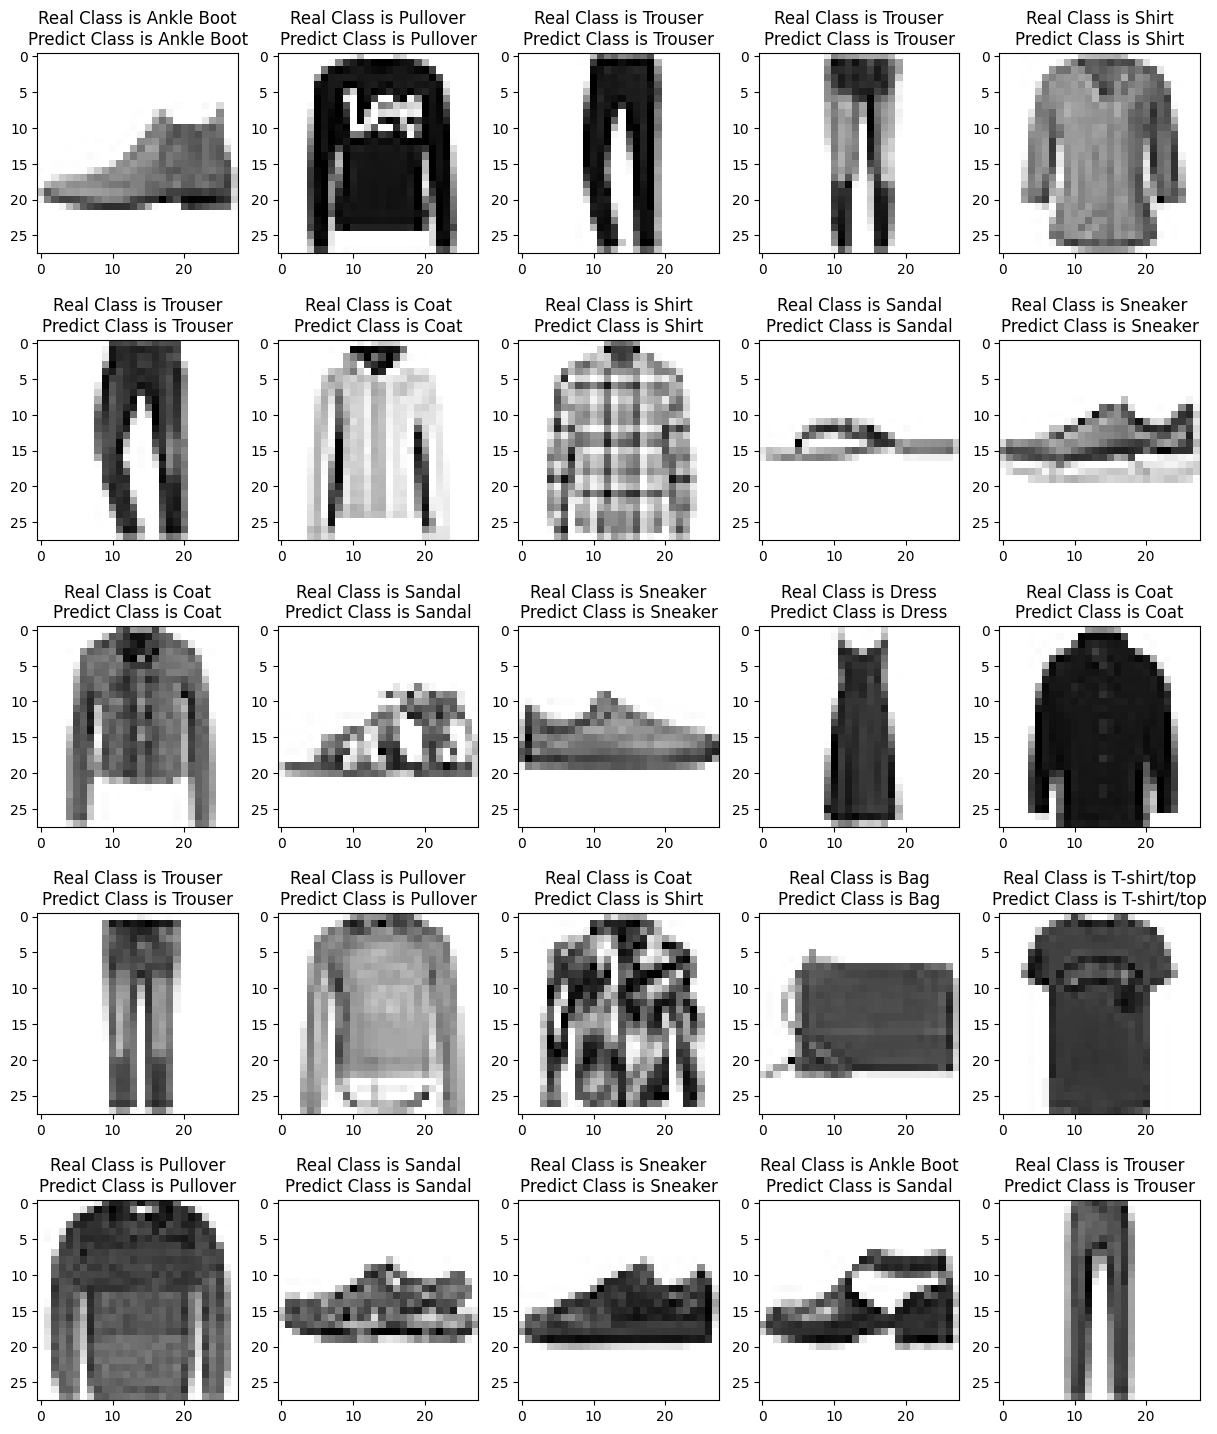

In [8]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(5, 5, figsize=(15, 18))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}")

In [9]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.81      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.87      0.88      1000
       Dress       0.94      0.89      0.91      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.73      0.81      0.77      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [10]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.81      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.87      0.88      1000
       Dress       0.94      0.89      0.91      1000
        Coat       0.85      0.89      0.87      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.73      0.81      0.77      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [11]:
from keras.applications.vgg16 import VGG16
from keras.utils import to_categorical
from keras.optimizers import Adam

In [12]:
# Load the data
(training_images, training_labels), (validation_images, validation_labels) = fashion_mnist.load_data()

In [13]:
print(f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}")
print(f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}")
print(f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}")
print(f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}")

Training images has shape: (60000, 28, 28) and dtype: uint8
Training labels has shape: (60000,) and dtype: uint8
Validation images has shape: (10000, 28, 28) and dtype: uint8
Validation labels has shape: (10000,) and dtype: uint8


In [16]:
# Resize the images 32*32 as required by VGG16
training_images_vgg = tf.image.resize(np.array(training_images)[..., tf.newaxis], (32, 32))
training_images_vgg = np.repeat(training_images_vgg, 3, axis=-1)
validation_images_vgg = tf.image.resize(np.array(validation_images)[..., tf.newaxis], (32, 32))
validation_images_vgg = np.repeat(validation_images_vgg, 3, axis=-1)

# Change pixel values from (0, 255) to (0, 1)
training_images_vgg = np.array(training_images_vgg) / 255.0
validation_images_vgg = np.array(validation_images_vgg) / 255.0

In [17]:
training_images_vgg.shape, validation_images_vgg.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [39]:
# Converting Labels to one hot encoded format
num_classes = 10
training_labels_vgg = to_categorical(training_labels, num_classes)
validation_labels_vgg = to_categorical(validation_labels, num_classes)

In [40]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

model_vgg = Sequential()
model_vgg.add(conv_base)
model_vgg.add(Flatten())
model_vgg.add(Dense(256, activation="relu"))
model_vgg.add(Dense(10, activation="softmax"))

model_vgg.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg = model_vgg.fit(
    training_images_vgg, training_labels_vgg, epochs=8, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/8
375/375 [==============================] - 10s 23ms/step - loss: 0.6092 - accuracy: 0.7916 - val_loss: 0.4795 - val_accuracy: 0.8238
Epoch 2/8
375/375 [==============================] - 7s 18ms/step - loss: 0.4329 - accuracy: 0.8429 - val_loss: 0.4380 - val_accuracy: 0.8390
Epoch 3/8
375/375 [==============================] - 7s 18ms/step - loss: 0.3971 - accuracy: 0.8550 - val_loss: 0.4121 - val_accuracy: 0.8519
Epoch 4/8
375/375 [==============================] - 8s 22ms/step - loss: 0.3742 - accuracy: 0.8642 - val_loss: 0.3913 - val_accuracy: 0.8602
Epoch 5/8
375/375 [==============================] - 7s 18ms/step - loss: 0.3582 - accuracy: 0.8689 - val_loss: 0.3798 - val_accuracy: 0.8618
Epoch 6/8
375/375 [==============================] - 8s 22ms/step - loss: 0.3424 - accuracy: 0.8741 - val_loss: 0.3799 - val_accuracy: 0.8618
Epoch 7/8
375/375 [==============================] - 7s 18ms/step - loss: 0.3331 - accuracy: 0.8761 - val_loss: 0.3913 - val_accuracy: 0.8588
Epoch

In [41]:
total_params = model_vgg.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model_vgg.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 14,848,586 total parameters in this model.
There are 133,898 trainable parameters in this model.


In [42]:
results_vgg = model_vgg.evaluate(validation_images_vgg, validation_labels_vgg)
print(results_vgg)

313/313 [==============================] - 3s 9ms/step - loss: 0.3759 - accuracy: 0.8645
[0.37593787908554077, 0.8644999861717224]


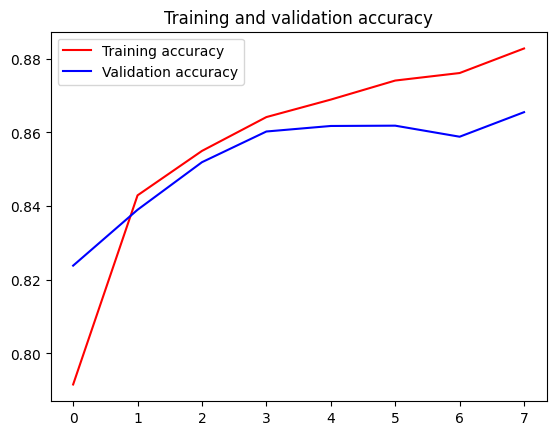

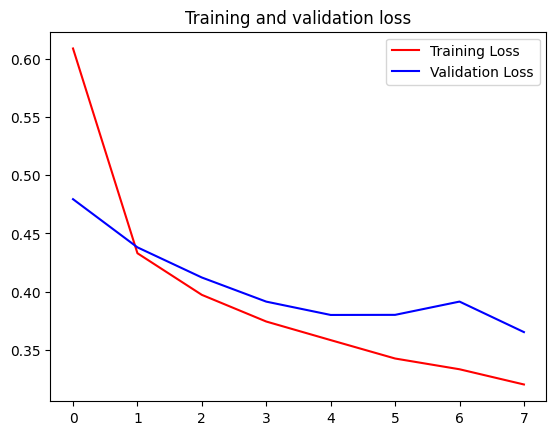

In [43]:
# Plot the chart for accuracy and loss on both training and validation
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:

model_vgg.summary()

In [44]:
#let's do additional training of the last three layers
for i, layer in enumerate(model_vgg.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


model_vgg = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [45]:
model_vgg.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history_vgg = model_vgg.fit(
    training_images_vgg, training_labels_vgg, epochs=3, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/3
375/375 [==============================] - 13s 28ms/step - loss: 0.4312 - accuracy: 0.8463 - val_loss: 0.3147 - val_accuracy: 0.8852
Epoch 2/3
375/375 [==============================] - 10s 27ms/step - loss: 0.2853 - accuracy: 0.8954 - val_loss: 0.3026 - val_accuracy: 0.8852
Epoch 3/3
375/375 [==============================] - 10s 27ms/step - loss: 0.2491 - accuracy: 0.9094 - val_loss: 0.2677 - val_accuracy: 0.9039


In [47]:
results_vgg2 = model_vgg.evaluate(validation_images_vgg, validation_labels_vgg)
print(results_vgg2)

313/313 [==============================] - 3s 11ms/step - loss: 0.2889 - accuracy: 0.8962
[0.2889002859592438, 0.8962000012397766]


313/313 [==============================] - 4s 10ms/step


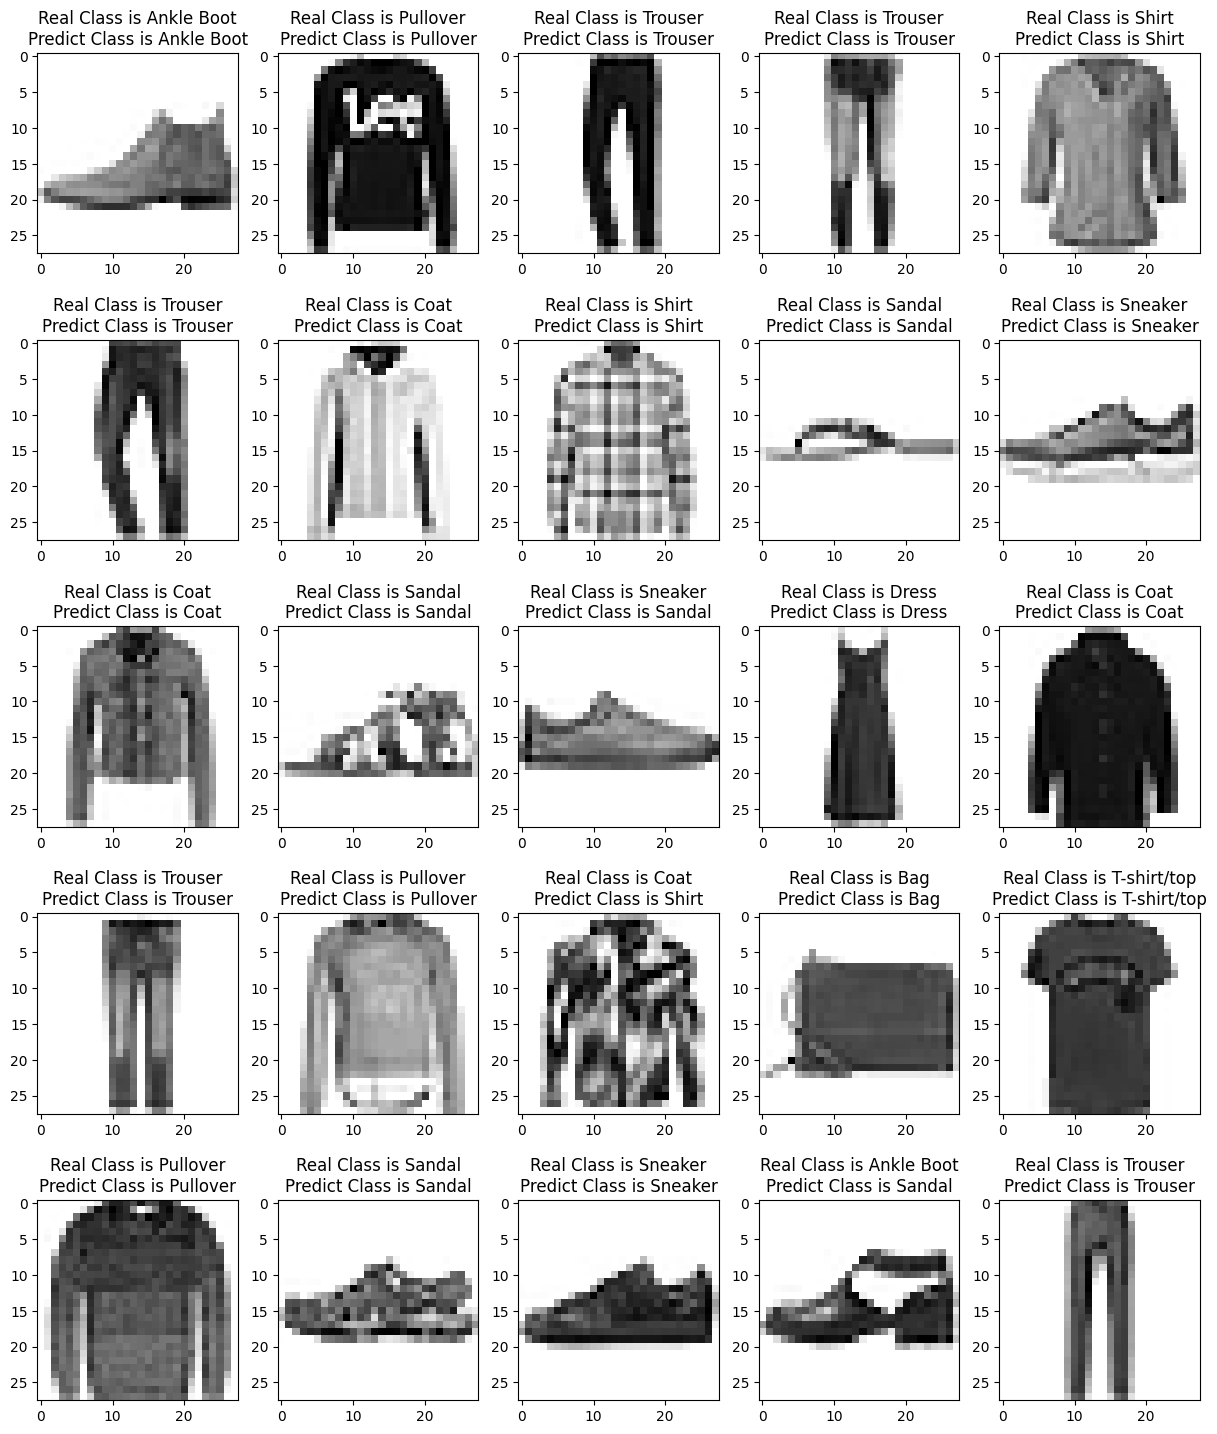

In [49]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model_vgg.predict(validation_images_vgg)
x_test__ = x_test.reshape(validation_images_vgg.shape[0], 28, 28)

fig, axis = plt.subplots(5, 5, figsize=(15, 18))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[validation_labels_vgg[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}")